In [1]:
def Ktbc(Type,n):  # 更改后的计算程序，大幅减少了行数
    Mat = np.zeros(n*n)
    for i in range(n):
        if i <n-1:
            Mat[(n+1)*i-1] = -1
            Mat[(n+1)*i] = 2
            Mat[(n+1)*i+1]=-1
        else:
            Mat[(n+1)*i-1] = -1
            Mat[(n+1)*i] = 2
    if Type == "K" or Type == "k" : pass
    elif Type == "T"or Type =="t": Mat[0]=1
    elif Type == "B"or Type =="b": Mat[0],Mat[n*n-1]=1,1
    elif Type == "C" or Type =="c": Mat[n-1],Mat[n*(n-1)]= -1,-1
    else :
        print("Please check input")
        raise ValueError
    Mat = Mat.reshape(n,n)
    Mat = np.mat(Mat)
    return Mat

In [2]:
import numpy as np 
import scipy.linalg as alg
n=5
Tn = Ktbc("T",n)
Tnp1 = Ktbc("T",n+1)
h = 1/(n+1)
c = np.pi/2


In [3]:
def f(x):
    return c**2*np.cos(c*x)

In [4]:
X1 = np.linspace(0,1,n+2)[1:-1]
print(X1)
Fn = f(X1)
u1 = np.linalg.solve(Tn,Fn)
u1

[ 0.16666667  0.33333333  0.5         0.66666667  0.83333333]


array([ 28.80412002,  26.42079357,  21.90063509,  15.63576056,   8.13718548])

In [5]:
X2 = np.linspace(0,1,n+2)[0:-1]
X2

array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
        0.83333333])

In [6]:
Fnp1=np.zeros(n+1)
Fnp1[1:]=Fn
Fnp1


array([ 0.        ,  2.38332645,  2.13683203,  1.74471605,  1.23370055,
        0.6386104 ])

In [7]:
u2= np.linalg.solve(Tnp1,Fnp1)
u2

array([ 28.80412002,  28.80412002,  26.42079357,  21.90063509,
        15.63576056,   8.13718548])

In [8]:
Ktbc("T",3)**-1*np.ones(3).reshape(3,1)

matrix([[ 6.],
        [ 5.],
        [ 3.]])

#### Solve equation :
$$ \frac {-d^2u}{dx^2} + \frac{du}{dx} = 1 $$
<center> $ u(0)=0 $ $u(1)=0$ </center>
Exact solution:
    $$ u = x + A + Be^x $$

In [9]:
def kx(n,c):
    Mat = np.zeros(n*n)
    h = c/(n+1)
    for i in range(n):
        if i <n-1:
            Mat[(n+1)*i-1] = -(1+h/2)
            Mat[(n+1)*i] = 2
            Mat[(n+1)*i+1]=-(1-h/2)
        else:
            Mat[(n+1)*i-1] = -(1+h/2)
            Mat[(n+1)*i] = 2
            
    Mat = Mat.reshape(n,n)
    return Mat

In [10]:
n =20
u = np.linalg.solve(kx(n,1),np.ones(n).reshape(n,1)*(1/(n+1)**2))
u

array([[ 0.01923843],
       [ 0.03709243],
       [ 0.05349449],
       [ 0.06837376],
       [ 0.08165597],
       [ 0.09326322],
       [ 0.10311379],
       [ 0.111122  ],
       [ 0.11719797],
       [ 0.12124744],
       [ 0.12317158],
       [ 0.12286669],
       [ 0.12022405],
       [ 0.11512962],
       [ 0.1074638 ],
       [ 0.09710116],
       [ 0.08391015],
       [ 0.06775278],
       [ 0.04848438],
       [ 0.02595317]])

In [11]:
A = 1/(np.e-1)
B = -1*A
X = np.linspace(0,1,n+2)[1:-1]
Y = A + X + B*np.exp(X)
Y = Y.reshape(n,1)

In [12]:
error = Y -u
error


array([[ -2.99361381e-06],
       [ -5.86530435e-06],
       [ -8.59605580e-06],
       [ -1.11652874e-05],
       [ -1.35507459e-05],
       [ -1.57283915e-05],
       [ -1.76722768e-05],
       [ -1.93544171e-05],
       [ -2.07446542e-05],
       [ -2.18105106e-05],
       [ -2.25170349e-05],
       [ -2.28266380e-05],
       [ -2.26989188e-05],
       [ -2.20904792e-05],
       [ -2.09547280e-05],
       [ -1.92416728e-05],
       [ -1.68976986e-05],
       [ -1.38653339e-05],
       [ -1.00830015e-05],
       [ -5.48475531e-06]])

In [13]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'r--', X, u, 'bs', linewidth=2) 
plt.show()

<Figure size 640x480 with 1 Axes>

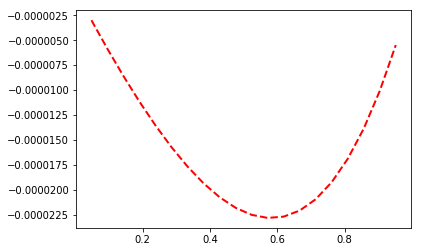

In [14]:
plt.plot(X,error,"r--",linewidth = 2)
plt.show()

In [15]:
P,L,U= alg.lu(kx(4,1))
print(P)
print(L)
print(U)


[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.          0.          0.          0.        ]
 [-0.55        1.          0.          0.        ]
 [ 0.         -0.73089701  1.          0.        ]
 [ 0.          0.         -0.81955446  1.        ]]
[[ 2.         -0.9         0.          0.        ]
 [ 0.          1.505      -0.9         0.        ]
 [ 0.          0.          1.34219269 -0.9       ]
 [ 0.          0.          0.          1.26240099]]


In [16]:
A = np.array([[1,1,0],[1,1,1],[0,1,1]])


In [17]:
A = np.mat(A)
f = A*np.mat([1,2,3]).reshape(3,1)
u = np.linalg.solve(A,f)

P,L,U = alg.lu(A)
print(A)
print(P)
print(L)
print(U)
print(L*U)
print(P*A)


[[1 1 0]
 [1 1 1]
 [0 1 1]]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  1.]]
[[ 1.  1.  0.]
 [ 0.  1.  1.]
 [ 0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.  1.  0.]
 [ 0.  1.  1.]
 [ 1.  1.  1.]]


In [27]:
B = np.mat([3,6,5]).reshape(3,1)

print(np.linalg.det(A))
print(B)
np.divide(A,B)

-1.0
[[3]
 [6]
 [5]]


matrix([[ 0.33333333,  0.33333333,  0.        ],
        [ 0.16666667,  0.16666667,  0.16666667],
        [ 0.        ,  0.2       ,  0.2       ]])